In [1]:
import numpy as np
import matplotlib.pyplot as plt

Пусть $f:\mathbb{R}^{n+m}_{+}\rightarrow\mathbb{R}^{n}_{+}$ - непрерывная, монотонно-неубывающая функция, обращающимися в нуле в нуль. Также пусть она покомпонентно-вогнута и 1-положительна однородна. Тогда эта функция называется \textbf{неоклассической}, а класс таких функций обозначается как $\mathbf{\Phi_{n+m}}$. Интересным параметрическим подклассом для этих функций является класс $CES_{n+m}\subset\Phi_{n+m}$, содержащие функции вида $f^{j}(x, y) = \left[\sum\limits_{i=1}^{n}\left(A^{j}_{i}x^{i}\right)^{-\rho_{j}} + \sum\limits_{k=1}^{m}\left(B^{j}_{k}y^{k}\right)^{-\rho_{j}}\right]^{\frac{-1}{\rho_{j}}}$, где $A,B\geq0$ а $\rho\in(0,-1)^{n}$ - параметры. Так получается, что пара $(B,y)$ избыточна, ведь это оба - параметры. Заменим их величиной $b^{j} = \left[\sum\limits_{k=1}^{m}\left(B^{j}_{k}y^{k}\right)^{-\rho_{j}}\right]^{\frac{-1}{\rho_{j}}}$

Зафиксируем функцию $f\in\Phi_{n+m}$ и вспомогательный вектор $y\in\mathbb{R}^{m}_{++}$, для которых будем решать задачу по поиску $x\in\mathbb{R}^{n}_{++}$ решающий уравнение $f(x,y) = x$. Для численных экспериментов с нахождением решений сузим класс функций до $CES$, с которыми будем далее экспериментировать.

In [309]:
class CES():
    def __call__ (self, x): # векторризуй это
        y = np.array([sum([np.power(self.A[i, j] * x[j], -1 * self.rho[i]) for j in range(self.n)]) for i in range(self.n)])
        y = np.array(np.power(y + np.power(self.b, -1 * self.rho), -1 / self.rho))
        return y
        
    def set_param(self, A, b, rho):
        self.n = A.shape[0]
        self.A = A
        self.b = b
        self.rho = rho
        return self
        
    def randomize(self, n): #вместо случайных матриц лучше брать реальные задачи 
        self.n = n
        rho = -1 * (np.random.random() * 0.9 + 0.05)
        A = np.random.randint(0, 2, (n, n))
        B = np.array([[np.power(A[i, j], -1 * rho) for j in range(n)] for i in range(n)])
        d = np.power(max(np.sum(B, axis = 0)), -1 / rho)
        self.A =  A / d
        self.b = np.random.random(n)
        self.rho = np.ones(n) * rho + 0.025 * (1 - 2 * np.random.uniform(n))
        return self
    
    def get_g(self):
        c = np.array([np.power((1 - np.power(self.A[i,i], -1 * self.rho[i])), 1/self.rho[i]) for i in range(self.n)])
        A = np.diag(c) @ self.A
        for i in range(self.n):
            A[i, i] = 0
        b = np.diag(c) @ self.b
        return CES().set_param(A,b,self.rho)

In [310]:
n = 61
f = CES().randomize(n = n)
g = f.get_g()

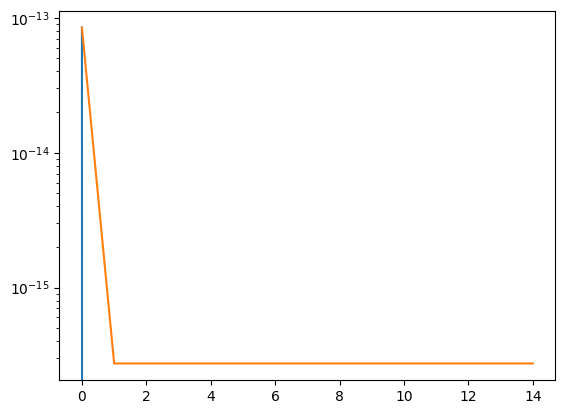

In [311]:
x = np.zeros(n)
y = np.zeros(n)
data_f = []
data_g = []
for i in range(15):
    x = f(x)
    y = g(y)
    data_f.append(np.linalg.norm(f(x) - x))
    data_g.append(np.linalg.norm(f(y) - y))
plt.plot(data_f)
plt.plot(data_g)
plt.yscale('log')

In [312]:
x - f.b

array([4.44089210e-15, 4.55191440e-15, 1.09912079e-14, 1.20459198e-14,
       7.43849426e-15, 6.16173779e-15, 6.21724894e-15, 8.21565038e-15,
       1.16850973e-14, 7.77156117e-15, 6.88338275e-15, 7.10542736e-15,
       7.21644966e-15, 5.88418203e-15, 7.43849426e-15, 4.88498131e-15,
       5.55111512e-15, 8.21565038e-15, 1.18793864e-14, 1.36696210e-14,
       6.43929354e-15, 6.88338275e-15, 5.32907052e-15, 9.60342916e-15,
       5.44009282e-15, 9.93649607e-15, 1.49602553e-14, 8.43769499e-15,
       6.77236045e-15, 4.32986980e-15, 7.10542736e-15, 4.32986980e-15,
       5.38458167e-15, 5.10702591e-15, 4.66293670e-15, 6.43929354e-15,
       3.88578059e-15, 7.10542736e-15, 1.17128529e-14, 4.77395901e-15,
       7.10542736e-15, 7.04991621e-15, 1.00475184e-14, 1.09912079e-14,
       1.01030295e-14, 6.32827124e-15, 8.54871729e-15, 7.32747196e-15,
       3.48471252e-14, 9.27036226e-15, 2.88657986e-15, 8.93729535e-15,
       7.38298311e-15, 2.23987495e-14, 4.77395901e-15, 2.30371278e-14,
      

In [313]:
f(x) - x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Для синтетических данных что-то не получилось интересных результатов - все цены приблизительно равны затратам на первичные ресурсы. Значит подготовим тестов из реальных данных, а именно NIOT __(National Input-Output Tables)__.

In [314]:
import pandas as pd
table_raw = pd.read_excel('NIOTS/RUS_NIOT_nov16.xlsx', index_col=0, sheet_name='National IO-tables').to_numpy()
table_cutted = table_raw[1:,3:-1].reshape(15, 120, 62)
table_new = np.zeros((15,59,62))
table_new[:,:56,:] = table_cutted[:,:56,:] #межотраслевое в пределах страны
table_new[:,56,:] = np.sum(table_cutted[:,56:112,:], axis = 1) + table_cutted[:,118,:] #импорт + международный транспорт
table_new[:,57,:] = np.sum(table_cutted[:,113:117,:], axis = 1) #зарплаты
table_new[:,58,:] = table_cutted[:,117,:] #добавленная стоимость
# 56 отраслей, 3 первичных ресурса, 6 конечных потребителя

Чисто нулевые строки и столбцы можно вычеркнуть за ненадобностью - их не производят и не потребляют. Вычеркнем их из теблицы для дальнейшего анализа.

/tmp/ipykernel_10685/759295027.py:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(table_agr), cmap='hot', interpolation='nearest')


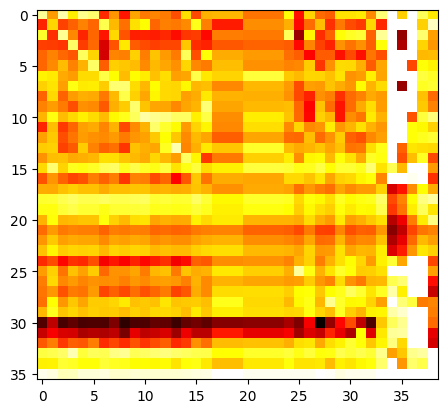

In [426]:
table = table_new[0]
I = []
J = []
for i in range(56):
    if np.sum(table[i,:]) == 0:
        I.append(i)
    if np.sum(table[:,i]) == 0:
        J.append(i)
table_agr = np.array([[table[i, j] for j in range(62) if j not in J] for i in range(59) if i not in I]) #агрегированная таблица затрата-выпуск
table_agr = table_agr @ np.diag(1 / np.sum(table_agr, axis = 0))
plt.imshow(np.log(table_agr), cmap='hot', interpolation='nearest')
plt.show()

Имея на руках симметричную таблицу __NOIT__ и зафиксировав набор степеней $\{\rho_{i}\in(-1, 0)\}_{i=1}^{n+l}$ можно найти такие коэффициенты $A, B\geq 0$ что производственные $CES$-функции с этими коэффициентами, которые вопсроизводят выпуск из __NOIT__ при заданном потреблении. Вопрос - воспроизводят ли они равновесие? Но сначала найдем коэффициенты для производственных функций.
Тогда зафиксируем $\{R_{i}\in(0,+\infty)\}_{i=1}^{n+l}$ - показатели производственных функций\функций полезности конечных потребителей.

In [433]:
n, m, l = table_agr.shape[0] - 3, 3, 6
rho = np.random.uniform(-0.99,-0.01,n)
R = -1 * rho / (1 + rho)
total= np.sum(table_agr, axis = 1)
raw = np.array([np.power(sum([np.power(table_agr[j,i]/total[j], -1 * R[i]) for j in range(n + m)]), -1 / R[i]) for i in range(n)])
A = np.array([[total[j] * raw[i] / total[i] for j in range(n+m)] for i in range(n)])

In [516]:
s = np.array([1, 1, 1])
A, b = A[:n,:n], np.array([np.power(sum([np.power(A[:n,-m:][j,k] * s[k], -1 * rho[j]) for k in range(m)]), -1 / rho[j]) for j in range(n)])
f = CES().set_param(A, b, rho)
g = f.get_g()

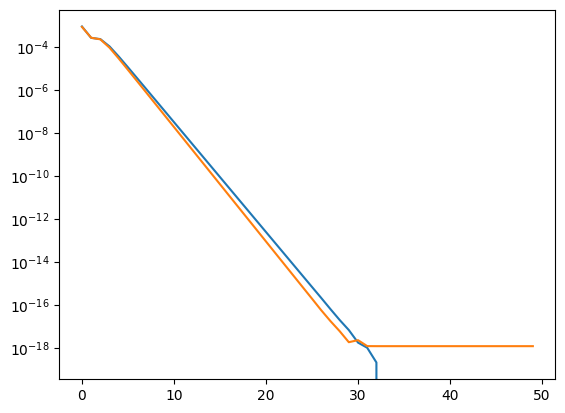

In [517]:
p = np.zeros(n)
q = np.zeros(n)
data_f = []
data_g = []
for i in range(50):
    p = f(p)
    q = g(q)
    data_f.append(np.linalg.norm(f(p) - p))
    data_g.append(np.linalg.norm(f(q) - q))
plt.plot(data_f)
plt.plot(data_g)
plt.yscale('log')

Осталось раздобыть реальные индексы цен и проверить насколько быстро происходящее сходится. А то пока до машинной точности за 30 шагов.
"медленная" итерация вообще якобы находит точное решение. Да и достегает большей точности, видимо из-за сомнительной вычислительной точности. 

Имея индекс цен можно расчитать пропорциональные ресурчные корзины:

In [518]:
table_1 = np.array([[A[i, j] * np.power(p[i]/A[i,j]/p[j], 1 + rho[i]) for j in range(n)] for i in range(n)]).T
table_2 = table_agr[:33,:33]

0.9137989497670345


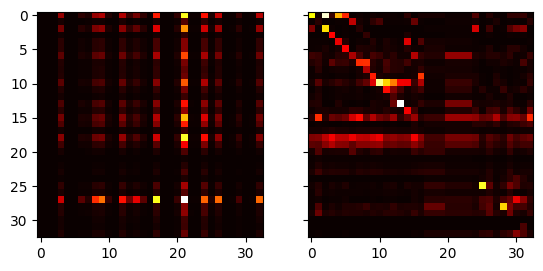

In [519]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(table_1, cmap='hot', interpolation='nearest')
ax2.imshow(table_2, cmap='hot', interpolation='nearest')
error = np.mean(np.array([np.linalg.norm(table_1[:, j]/np.linalg.norm(table_1[:, j]) - table_2[:, j]/np.linalg.norm(table_2[:, j])) for j in range(n)]))
print(error)

Ахахаха, а что-то не работает лол. __(ИЛИ ЭТО И ЕСТЬ ХОРОШО?)__

Все-таки я везде оставляю один и тот же $\rho$, а $s$ выбираю от балды. 

Вероятно необходимо определить условия существования, и подгонять аки машинисты.